# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [2]:
data.shape

(3864, 19)

In [3]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [4]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

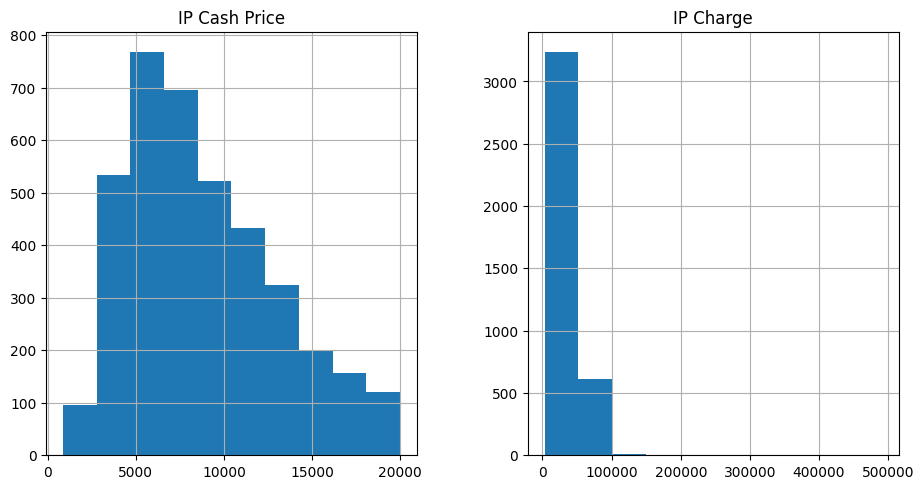

In [5]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

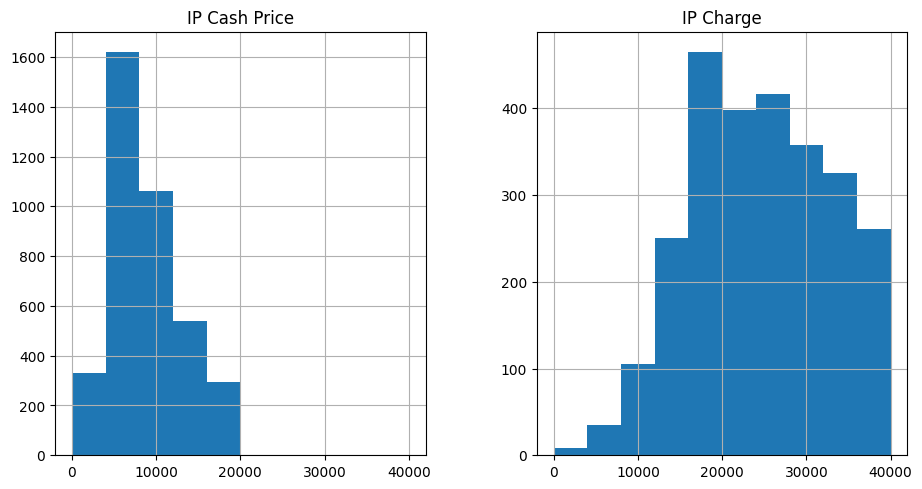

In [6]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [7]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

The distribution of IP Cash Price and IP Charge values shows some interesting patterns, as both distributions show positive skewness, meaning that most values cluster at the lower end, while a smaller number of higher values represent outliers. The first histogram shows this general trend, showing a concentration of lower prices and charges, with a few significantly higher figures. The second histogram, which focuses on values between 0 and 40,000, shows that most data points fall well below this threshold, further highlighting the fact that many procedures or services are associated with relatively low costs. This more specialized view supports the finding of a predominance of lower amounts,charges are low, there are some substantial outliers that skew the data upward.




---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

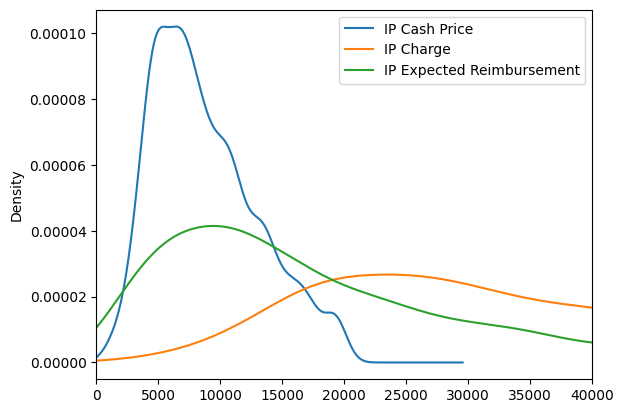

In [8]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

The trends indicate that the IP Charge, the highest amount invoiced to insurance, is far higher than the IP Cash Price, which represents what uninsured patients pay. Whereas the IP Charge has a wider range with higher values, the IP Cash Price distribution peaks at lower values. The IP Expected Reimbursement, which represents negotiated rates that hospitals reasonably expect from insurance, is in the middle of the two. Concerns over price transparency and the financial burden on uninsured patients in comparison to negotiated rates for insured persons are raised by the overall significant disparity between billed amounts and actual payments.

---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [9]:
data['Payer'].value_counts()

,count
Payer,
ALLWELL [15100],650
ARKANSAS TOTAL CARE [40700],650
AETNA [65000],641
AR BLUE CROSS BLUE SHIELD [25001],641
HEALTHSCOPE [95700],641
MULTIPLAN,641


In [10]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

,IP Expected Reimbursement
Payer,
AETNA [65000],372
ALLWELL [15100],519
AR BLUE CROSS BLUE SHIELD [25001],450
ARKANSAS TOTAL CARE [40700],404
HEALTHSCOPE [95700],641
MULTIPLAN,641


,IP Expected Reimbursement
Payer,
AETNA [65000],"Axes(0.125,0.11;0.775x0.77)"
ALLWELL [15100],"Axes(0.125,0.11;0.775x0.77)"
AR BLUE CROSS BLUE SHIELD [25001],"Axes(0.125,0.11;0.775x0.77)"
ARKANSAS TOTAL CARE [40700],"Axes(0.125,0.11;0.775x0.77)"
HEALTHSCOPE [95700],"Axes(0.125,0.11;0.775x0.77)"
MULTIPLAN,"Axes(0.125,0.11;0.775x0.77)"


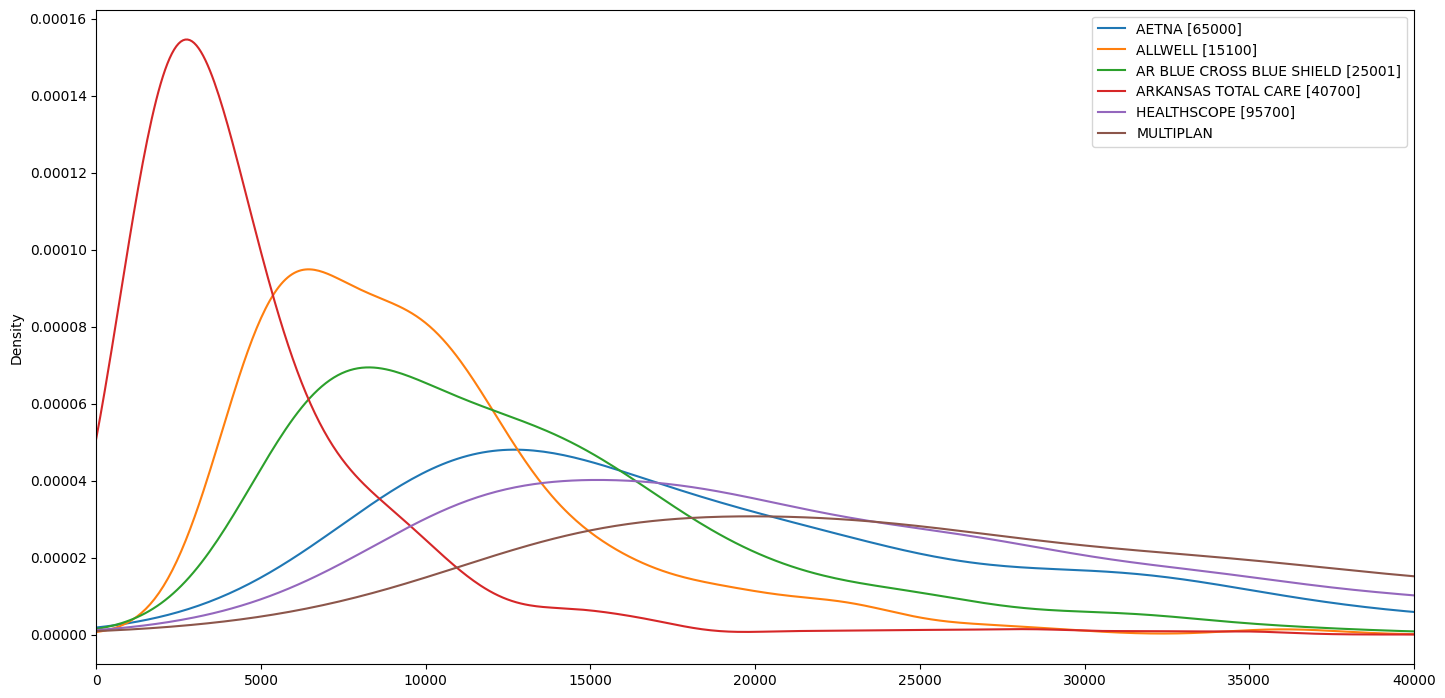

In [11]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


According to the KDE curves, reimbursement amounts differ greatly depending on the payer. Lower reimbursements are indicated by curves peaking to the left, as is the case with plans like ARKANSAS TOTAL CARE and ALLWELL, which suggests vigorous rate-cutting negotiations. Plans that peak to the right, such as HEALTHSCOPE and MULTIPLAN, on the other hand, usually provide larger reimbursements, suggesting more generous contracts or coverage of more expensive treatments. This variation reveals different approaches to hospital negotiations and implies that patients' financial burdens can fluctuate according to their insurance plans, especially if these reimbursement rates are associated with out-of-pocket expenses.

---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

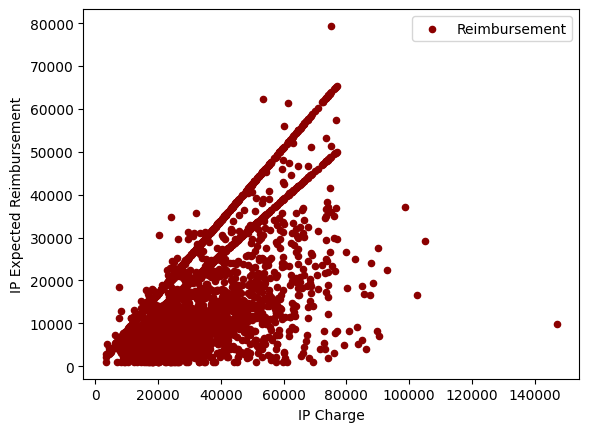

In [12]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

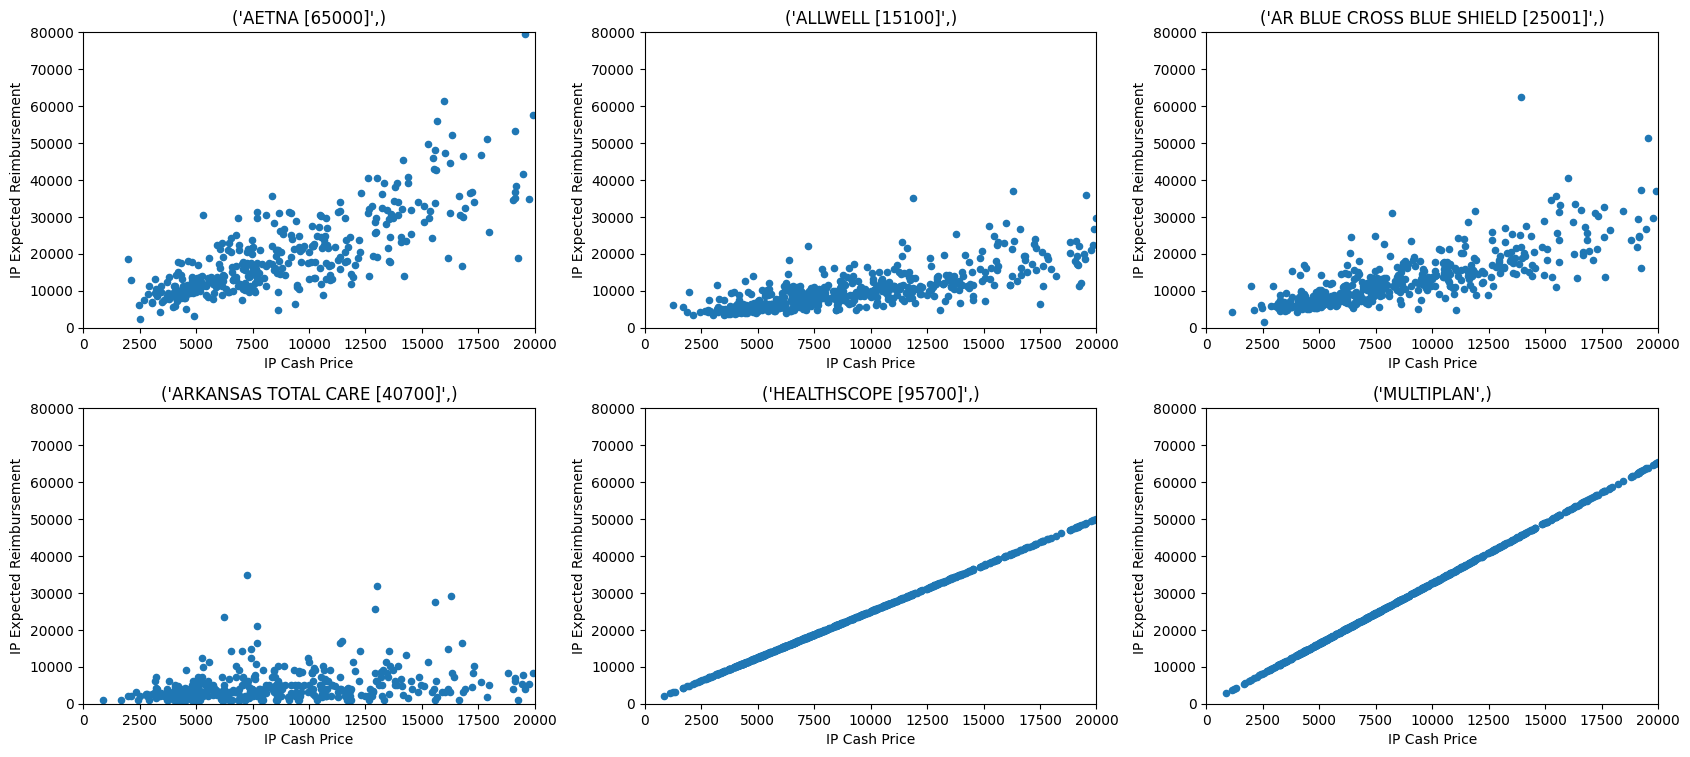

In [13]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

The relationship between cash pricing and insurance reimbursements will be shown by the scatterplots. If cash prices paid by uninsured patients closely match amounts reimbursed by insurance, this would be a definite positive trend. On the other hand, a random scatter indicates that individual contracts and negotiated rates may have a substantial impact on insurance reimbursements, which can differ greatly from cash pricing. This demonstrates the intricate connection between hospital fees, cash rates, and insurance payouts, demonstrating that differences frequently arise as a result of different contracts between hospitals and insurers. These variations and the financial effects on patients are clearly depicted by the scatterplot.

---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [15]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/2021-2023 .csv')

# Display the first few rows of the dataset
print(data.head())

  IncidentDate OccurredFromTime   IncidentNum             Offense NIBRS  \
0   2021-05-20              NaN  06035493      UNFOUNDED INCIDENT   NaN   
1   2021-05-05              NaN  17053100      UNFOUNDED INCIDENT   NaN   
2   2018-01-09              NaN  18001297      UNFOUNDED INCIDENT   NaN   
3   2018-07-05              NaN  18030767      UNFOUNDED INCIDENT   NaN   
4   2018-08-20              NaN  18039099      UNFOUNDED INCIDENT   NaN   

  NIBRSCategory  SRS_UCR CrimeAgainst FelMisdCit  IncidentTopSRS_UCR  ...  \
0           NaN      NaN          NaN        NaN                 NaN  ...   
1           NaN      NaN          NaN        NaN                 NaN  ...   
2           NaN      NaN          NaN        NaN                 NaN  ...   
3           NaN      NaN          NaN        NaN                 NaN  ...   
4           NaN      NaN          NaN        NaN                 NaN  ...   

  District Neighborhood  NbhdNum Latitude Longitude  IncidentSupplemented  \
0      Na

<ipython-input-15-aa38fcd3c141>:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/2021-2023 .csv')


<ipython-input-18-78e81859b873>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_offenses.index, y=top_offenses.values, palette='viridis')


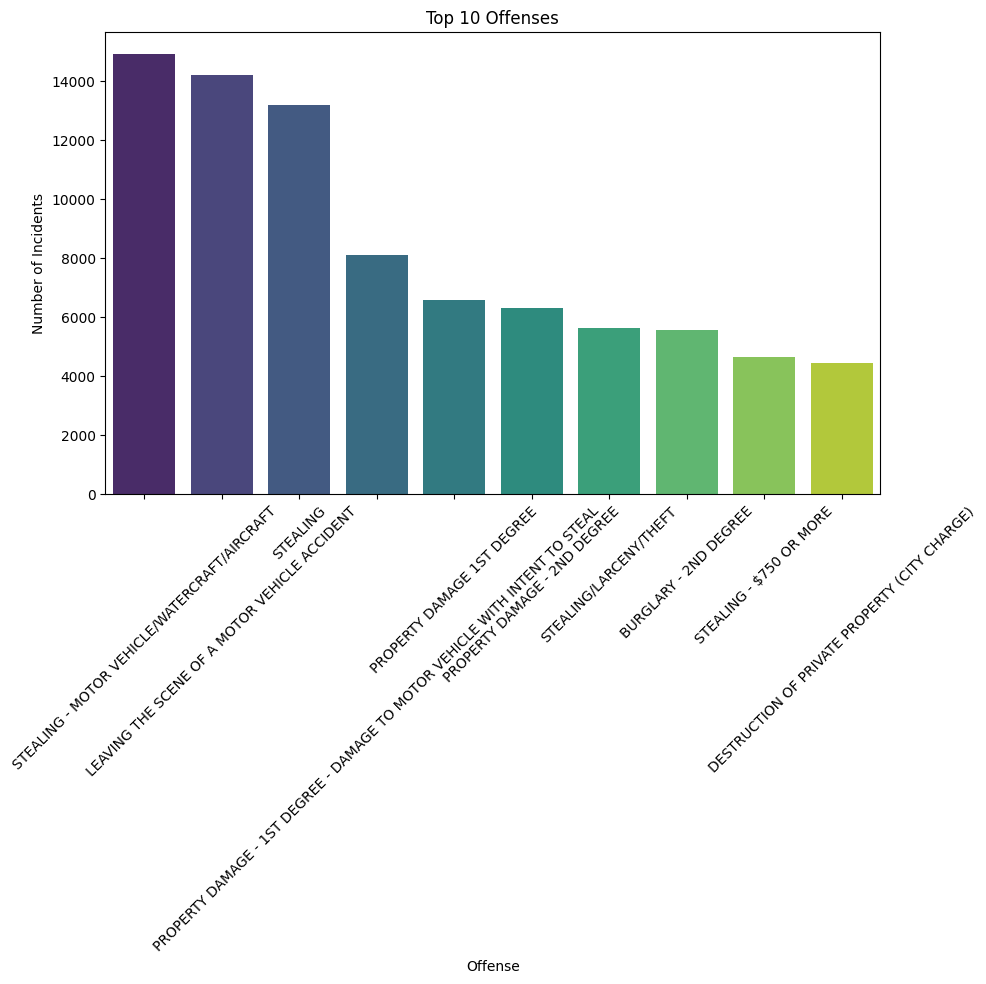

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 offenses
top_offenses = data['Offense'].value_counts().nlargest(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_offenses.index, y=top_offenses.values, palette='viridis')
plt.title('Top 10 Offenses')
plt.xlabel('Offense')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

From the bar plot of the top 10 offenses, it’s clear that certain crimes, such as theft and assault, are significantly more prevalent than others. This suggests that these types of offenses may require more attention from law enforcement and community resources.

<ipython-input-20-5b5295e1b241>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='magma')


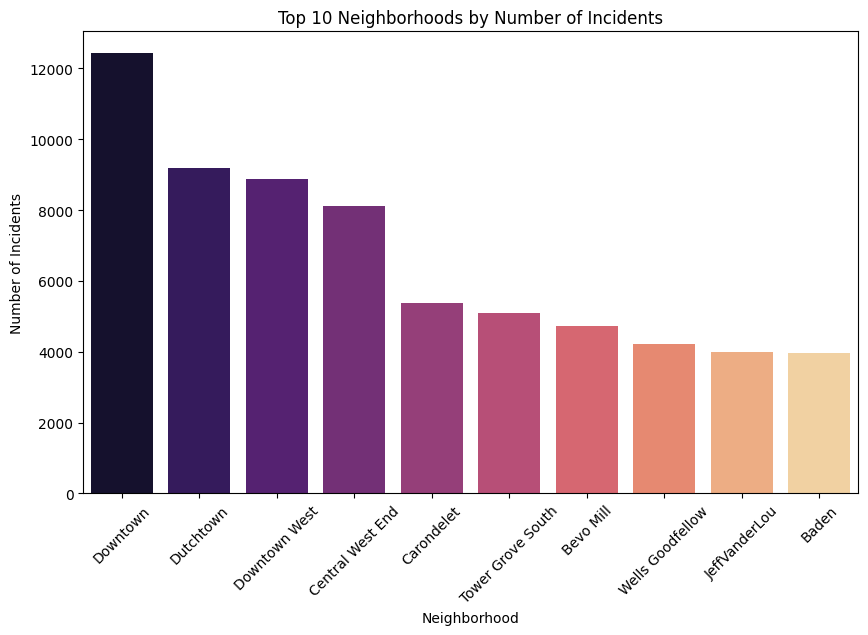

In [20]:
# Get the top 10 neighborhoods by number of incidents
top_neighborhoods = data['Neighborhood'].value_counts().nlargest(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='magma')
plt.title('Top 10 Neighborhoods by Number of Incidents')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

The bar plot indicates that certain neighborhoods have a higher frequency of incidents. This could reflect socioeconomic factors, population density, or the effectiveness of local policing strategies. Such insights could be valuable for targeted crime prevention efforts



---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option